# Análisis de componentes principales



*Carlos Isaac Zainea Maya*

**Universidad Central**

## Introducción




> * El análisis en componentes principales es una técnica de análisis estadístico multivariante que se clasifica entre los métodos de simplificación o reducción de la dimensión. Se aplica cuando se dispone de un conjunto elevado de variables y busca reescribir los valores a partir de combinaciones lineales que se denominan componentes principales o factores.
>
> *  Es un método que permite describir, de un modo
sintético, la estructura y las interrelaciones de las variables originales en el fenómeno que se estudia a partir de las componentes obtenidas que, naturalmente, habrá que interpretar y «nombrar».
>
>* La reducción de variables a pocas componentes puede simplificar la aplicación sobre otras técnicas multivariantes (regresión, clusters, etc.)

Obtenemos las componentes principales a partir de la matriz de covarianzas o correlaciones y sus valores y vectores propios. Como dicha matriz es semidefinida positiva grantizamos la nonegatividad de los valores propios. Los organizamos de mayor a menor para definir el orden de los componentes.



## Objetivo operativo del ACP

* Describir la variación de un conjunto de variables correlacionadas, $x^T=(x_1,x_2,\cdots,x_q)$ en  términos de unas nuevas variables NO correlacionadas, $y^T=(y_1,y_2,\cdots,y_q)$, las cuales sean combinaciones lineales de las variables $x$.



Para lograr este objetivo iniciamos tipificando las variables, es decir, hacemos una transformación simple que produzca unas nuevas variables $Z_i$ con media $0$ y desviación estándar $1$. 

Lo hacemos porque, buscamos una matriz $U$ de $q\times q$ tal que:

$Y=Z\cdot U$

con $Z$ la matriz de todas las observaciones tipificadas.



**Pregunta** 

Si $Z$ es la matriz $n\times q$ que contiene todas las observaciones tipificadas ¿Qué puede decir de la matriz $Z^T Z$ de tamaño $q\times q$?

**Ejemplo**

Tipificaremos las variables cuantitativas de la superconocida base `iris`.

In [1]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [9]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values
x #la matriz que contiene a todas las observaciones

In [ ]:
y = df.loc[:,['target']].values
y

In [20]:
x2 = StandardScaler(with_std=False).fit_transform(x)
#x2 = StandardScaler().fit_transform(x)

In [21]:
standardbase=pd.DataFrame(x2, columns=['sepal length','sepal width','petal length','petal width'])

In [22]:
standardbase.head()

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [23]:
PromC1=df["sepal length"].mean()
DevestC1=np.std(df["sepal length"])
print(PromC1)
print(DevestC1)

5.843333333333335
0.8253012917851409


In [24]:
estandarización=lambda x:(x-PromC1)

In [25]:
df["sepal length"].apply(estandarización)

0     -0.743333
1     -0.943333
2     -1.143333
3     -1.243333
4     -0.843333
         ...   
145    0.856667
146    0.456667
147    0.656667
148    0.356667
149    0.056667
Name: sepal length, Length: 150, dtype: float64

Respuesta a las preguntas anteriores:

In [26]:
x2

array([[-7.43333333e-01,  4.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01, -5.40000000e-02, -2.35866667e+00,
        -9.98666667e-01],
       [-1.14333333e+00,  1.46000000e-01, -2.45866667e+00,
        -9.98666667e-01],
       [-1.24333333e+00,  4.60000000e-02, -2.25866667e+00,
        -9.98666667e-01],
       [-8.43333333e-01,  5.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-4.43333333e-01,  8.46000000e-01, -2.05866667e+00,
        -7.98666667e-01],
       [-1.24333333e+00,  3.46000000e-01, -2.35866667e+00,
        -8.98666667e-01],
       [-8.43333333e-01,  3.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.44333333e+00, -1.54000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01,  4.60000000e-02, -2.25866667e+00,
        -1.09866667e+00],
       [-4.43333333e-01,  6.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.04333333e+00,  3.46000000e-01, -2.15866667e+00,
      

In [29]:
np.dot(np.transpose(x2),(x2))*(1/149)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [28]:
np.cov(np.transpose(x))

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [44]:
COV=np.cov(np.transpose(x))

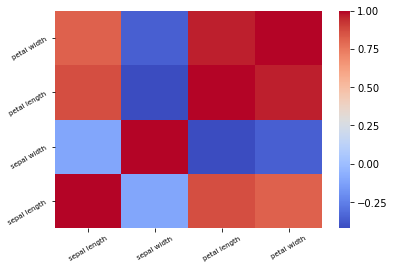

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,0:4].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()

In [33]:
df.iloc[:,0:4].cov()

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


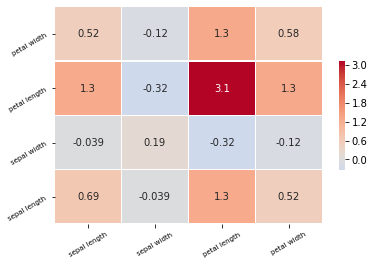

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,0:4].cov(),cmap='coolwarm', center=0,
             linewidths=.5, cbar_kws={"shrink": .5},annot=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()

## Volvamos al problema

Como se comentó, tenemos que calcular una matriz $U$ para hacer la transformación de $X$ a $Y$. Sin embargo, hay que cumplir algunas condiciones:

1. Primero deben aparecer variables que representen la mayor varianza de las variables $X$.

2. No puede haber correlación entre las variables en $Y$.

Con esta información iniciemos el calculo de cada variable en $Y$, las llamaremos componentes:

$$\begin{bmatrix}Y_{11}\\Y_{12}\\\vdots \\Y_{1n}\end{bmatrix}=\begin{bmatrix}X_{11}& X_{21}& \cdots&X_{q1}\\X_{12}& X_{22}& \cdots&X_{q2}\\\vdots& \vdots &\ddots&\vdots\\ X_{1n}& X_{2n}& \cdots&X_{qn}\end{bmatrix}\begin{bmatrix}u_{11}\\u_{12}\\\vdots \\u_{1q}\end{bmatrix}$$




**Cálculo de la primera componente y Varianza Maxima:**

Calcular la varianza de la primera componente equivale a:
$$V(Y_1)=\frac{1}{n}Y^T\cdot Y=\frac{1}{n}u_1^TX^TXu_1=u_1^TVu_1$$

Luego, debemos maximizar:
$$V(Y_1)=u_1^TVu_1$$ sujeto a $u^Tu=1$.

Es un problema de Lagrange, tenemos:

$$L=u_1^TVu_1-\lambda(u_1^Tu_1-1)$$

Derivando llegamos a:

$$(V-\lambda I)u_1=0$$

Que es un problema de valores y vectores propios.


## El cálculo de componentes

In [45]:
np.linalg.eig(COV)

(array([4.22484077, 0.24224357, 0.07852391, 0.02368303]),
 array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
        [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
        [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
        [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]]))

## Cálculo de componentes

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [48]:
principalDf.describe()

,principal component 1,principal component 2,principal component 3,principal component 4
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,5.358676e-16,-5.262457e-16,3.293662e-17,-3.402834e-16
std,2.055442e+00,4.921825e-01,2.802212e-01,1.538929e-01
min,-3.225200e+00,-1.262492e+00,-6.919416e-01,-5.035295e-01
25%,-2.530159e+00,-3.235986e-01,-2.027230e-01,-7.618597e-02
50%,5.533290e-01,-3.251102e-02,1.557634e-02,-4.322010e-04
75%,1.549463e+00,3.288601e-01,1.780586e-01,8.895186e-02
max,3.794687e+00,1.370524e+00,7.584587e-01,5.040950e-01


In [42]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

## Visualización en Python



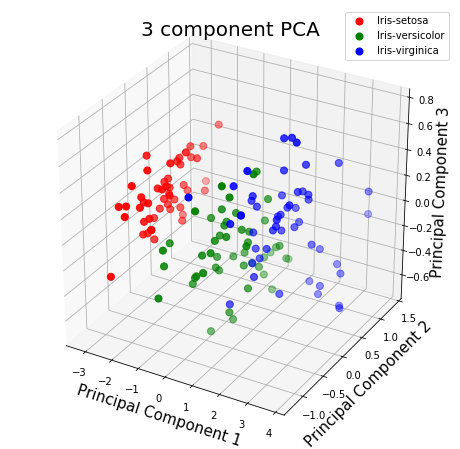

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_